In [75]:
import matplotlib.pyplot as plt
import os
import numpy as np
import networkx as nx

save_basepath = '/home/mila/j/jithendaraa.subramanian/scratch/biols_datasets/chemdata_dags'
os.makedirs(save_basepath, exist_ok=True)
basepath_chemdata = '/home/mila/j/jithendaraa.subramanian/scratch/biols_datasets/er1-ws_datagen_fix_noise_interv_noise-chemdataproj-d005-D2500-multi-n_pairs2000-sets20-gaussianinterv'

In [111]:
seeds = [0, 1, 2, 3, 4]
weighted_adjacencies = []
adjacencies = []

for seed in seeds:
    dag_file = f"{basepath_chemdata}/{str(seed).zfill(2)}/weighted_adjacency.npy"
    W = np.load(dag_file)
    G = np.where(np.abs(W) > 0.1, 1, 0)
    num_edges = np.sum(G)

    weighted_adjacencies.append(W)
    adjacencies.append(G)

vmin = -2.
vmax = 2.

In [112]:
print(vmin, vmax)

-2.0 2.0


In [118]:
def visualize_weighted_dags(weighted_adjacencies, filename):
    num_matrices = len(weighted_adjacencies)
    fig, axes = plt.subplots(1, num_matrices, figsize=(15, 5))
    cax = fig.add_axes([0.2, 0.1, 0.6, 0.05])  # Position of the colorbar

    for i in range(num_matrices):
        im = axes[i].imshow(weighted_adjacencies[i], cmap='coolwarm', vmin=vmin, vmax=vmax)
        axes[i].set_title(f'Seed {i}', fontsize=25)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=20)
    # plt.suptitle('Weighted Adjacency Matrices for the 5 seeds in chemistry dataset', fontsize=16)
    plt.tight_layout()
    plt.savefig(filename)
    print(f"Saved: {filename}")
    plt.show()

def visualize_networkx_dags(adjacencies, filename):
    num_matrices = len(adjacencies)
    fig, axes = plt.subplots(1, num_matrices, figsize=(20, 5))

    for i in range(num_matrices):
        G = nx.from_numpy_array(weighted_adjacencies[i], create_using=nx.DiGraph())
        pos = nx.circular_layout(G)
        nx.draw(G, pos, with_labels=True, font_size=20, edge_color='#7747a3', 
                arrowsize=30, node_size=1000, ax=axes[i], node_color='#c4abdb', 
                edgecolors='#7747a3', linewidths=1.5)
        axes[i].set_title(f'Seed {i}', fontsize=30)

    # plt.suptitle('Ground truth structures for the chemistry dataset', fontsize=20)
    plt.tight_layout()
    plt.savefig(filename)
    print(f"Saved: {filename}")
    plt.show()

Saved: /home/mila/j/jithendaraa.subramanian/scratch/biols_datasets/chemdata_dags/networkx_vis.pdf


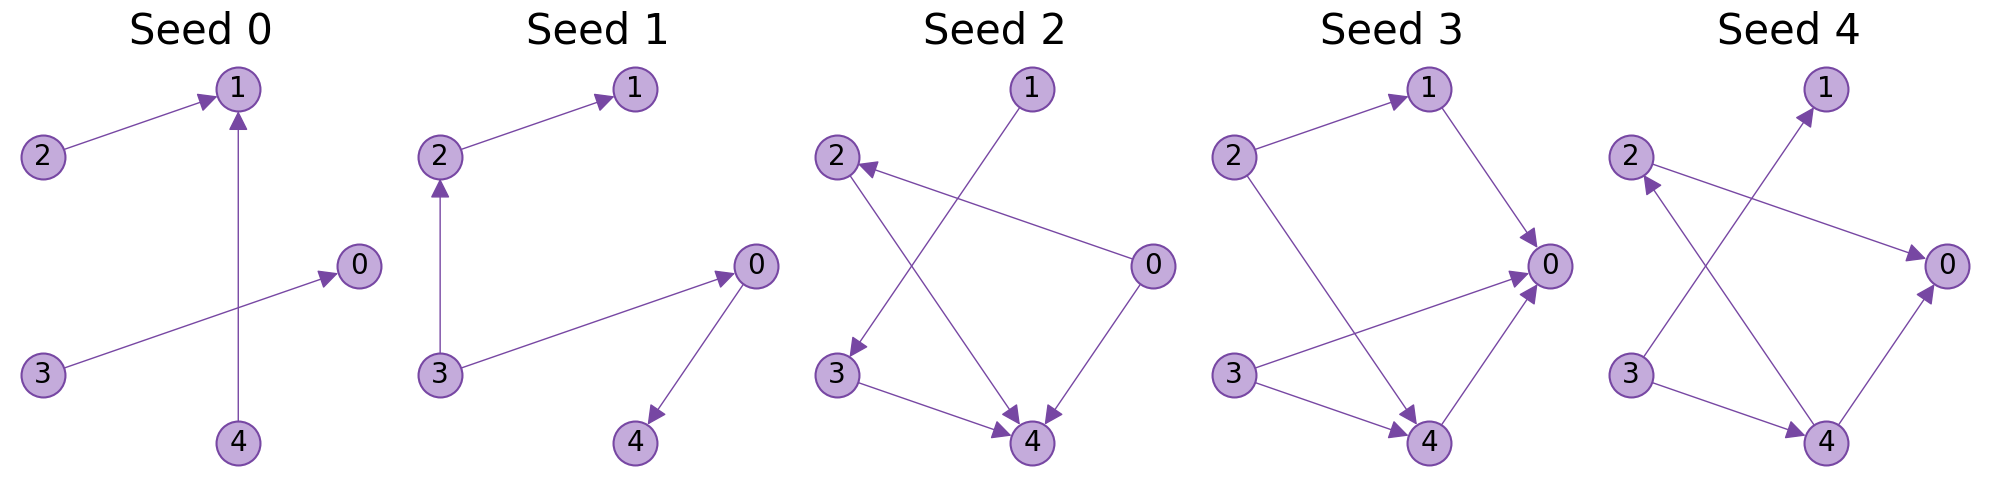

In [114]:
visualize_networkx_dags(adjacencies, f"{save_basepath}/networkx_vis.pdf")

/tmp/ipykernel_16211/1976611014.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: /home/mila/j/jithendaraa.subramanian/scratch/biols_datasets/chemdata_dags/weighted_dag_vis.pdf


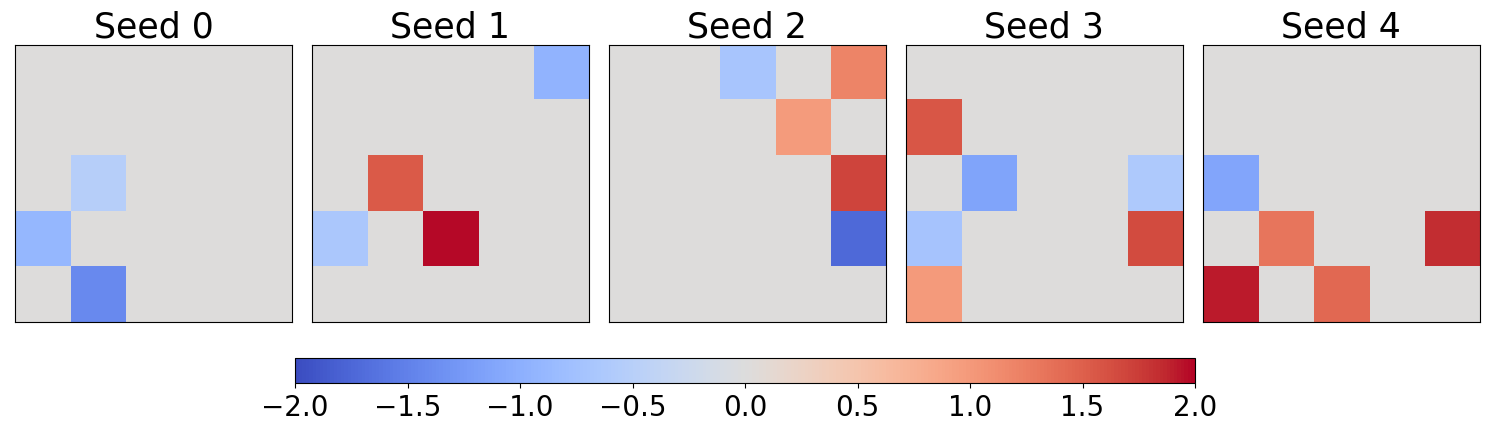

In [119]:
visualize_weighted_dags(weighted_adjacencies, f"{save_basepath}/weighted_dag_vis.pdf")